# Udacity Self Driving Car Nanodegree
# Project 2 : Traffic Sign Classification

---
# Step 0: Load The Data

Here the German traffic signs are taken from the website http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset as pickles.  They come in a set of three as training set, validation set and testing set. 

In [128]:
# Load pickled data
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

training_file = "/home/x/Desktop/privateGit/CarND-Traffic-Sign-Classifier-Project/data/TrainingData/train.p"
validation_file="/home/x/Desktop/privateGit/CarND-Traffic-Sign-Classifier-Project/data/ValidationData/valid.p"
testing_file = "/home/x/Desktop/privateGit/CarND-Traffic-Sign-Classifier-Project/data/TestingData/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']



---

# Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'`
- `'labels'` 
- `'sizes'` 
- `'coords'` 

## Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [129]:
import pandas as pd

l=X_train.shape
n_train = X_train.shape[0]
n_test = X_test.shape[0]
image_shape = X_train.shape[1:4]
signs = pd.read_csv("/home/x/Desktop/privateGit/CarND-Traffic-Sign-Classifier-Project/signnames.csv")
n_classes = signs.shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


# Step 2: Exploratory visualization of the dataset


The different classes are as follows 
 <bound method NDFrame.get of     ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                      

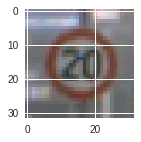

 
The label for the above image is
Speed limit (20km/h)


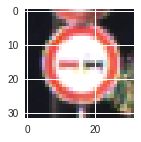

 
The label for the above image is
No passing


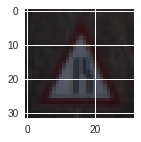

 
The label for the above image is
Road narrows on the right
the number of y_train with label  0 is  180
the number of y_train with label  1 is  1980
the number of y_train with label  2 is  2010
the number of y_train with label  3 is  1260
the number of y_train with label  4 is  1770
the number of y_train with label  5 is  1650
the number of y_train with label  6 is  360
the number of y_train with label  7 is  1290
the number of y_train with label  8 is  1260
the number of y_train with label  9 is  1320
the number of y_train with label  10 is  1800
the number of y_train with label  11 is  1170
the number of y_train with label  12 is  1890
the number of y_train with label  13 is  1920
the number of y_train with label  14 is  690
the number of y_train with label  15 is  540
the number of y_train with label  16 is  360
the number of y_train with label  17 is  990
the number of y_train with label  18 is  1080
the number of y_train with label  19 is  180
the number of y_train with label  20

In [130]:
import matplotlib.pyplot as plt


print("\nThe different classes are as follows \n",signs.get)
print("\nLets look at some sample images")

plt.figure(figsize=(2,2))
plt.imshow(X_train[10000])
plt.show()
print(" \nThe label for the above image is")
print(signs.iloc[y_train[10000]]["SignName"])


plt.figure(figsize=(2,2))
plt.imshow(X_train[12020])
plt.show()
print(" \nThe label for the above image is")
print(signs.iloc[y_train[12020]]["SignName"])


plt.figure(figsize=(2,2))
plt.imshow(X_train[11000])
plt.show()
print(" \nThe label for the above image is")
print(signs.iloc[y_train[11000]]["SignName"])


from random import shuffle
import numpy as np
%matplotlib inline



#tf.argmax
countList=[]
for x in range(0,43):
    count=0
    for y in y_train:
        if y==x:
            count=count+1
    print ("the number of y_train with label ",x,"is ",count)
    countList.insert(len(countList), count)
print(countList)



In [131]:
#data Visualization with Seaborn
import seaborn as sns


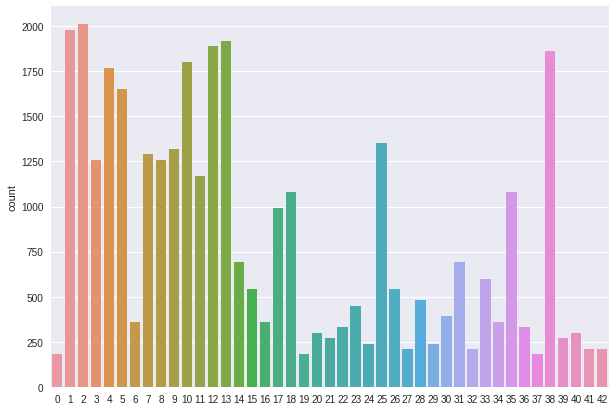

In [132]:
plt.figure(figsize=(10,7))
sns.countplot(y_train)

# Step 3: Generate more images by rotating them slightly for Classes with low number of training images

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline

the length of y_train is 40674


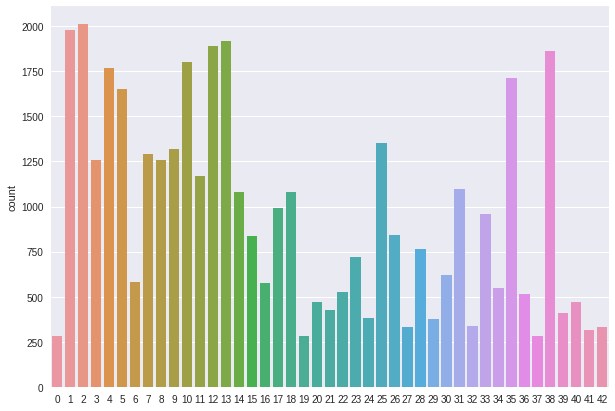

In [216]:

import seaborn as sns
import random
from PIL import Image
import numpy.random as ran
import numpy as ny
from sklearn.utils import shuffle
from skimage.transform import rotate
from skimage import color
def generateRandomNewImagesFromExisting(X_input, y_input, sign):
    for index in range(20000):
        if y_input[index] == sign:
            x = ny.random.randint(-20,20)
            X_new = rotate(X_input[index], 10, False,mode='edge',preserve_range=False)
            X_input = ny.append(X_input,X_new[None,:],axis=0)
            y_input = ny.append(y_input,y_input[index])
    return X_input, y_input
X_train,y_train=shuffle(X_train,y_train)  
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 0)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 6)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 14)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 15)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 16)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 19)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 20)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 21)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 22)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 23)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 24)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 26)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 27)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 28)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 29)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 30)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 31)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 32)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 33)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 34)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 35)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 36)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 37)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 39)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 40)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 41)
X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 42)
#X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 19)
#X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 20)
#X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 21)
#X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 22)
#X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 23)
#X_train, y_train = generateRandomNewImagesFromExisting(X_train, y_train, 24)
#Check if all features are properly filled
print("the length of y_train is" , len(y_train))
plt.figure(figsize=(10,7))
sns.countplot(y_train)

14
(32, 32, 3)
a [[[-0.19195237 -0.18104618 -0.21748498]
  [-0.19123825 -0.17589773 -0.21119184]
  [-0.17682753 -0.15762501 -0.19995162]
  ..., 
  [-0.12576273 -0.12121583 -0.17878868]
  [-0.14619193 -0.14028308 -0.19513204]
  [-0.16662112 -0.15935033 -0.2114754 ]]

 [[-0.18514264 -0.17627936 -0.21544206]
  [-0.19191923 -0.17725967 -0.21255379]
  [-0.17955143 -0.16102988 -0.20199454]
  ..., 
  [-0.1862756  -0.17843247 -0.22277124]
  [-0.18968047 -0.18183733 -0.22413318]
  [-0.19308534 -0.1852422  -0.22549513]]

 [[-0.17833291 -0.17151255 -0.21339914]
  [-0.1926002  -0.17862162 -0.21391574]
  [-0.18227532 -0.16443475 -0.20403746]
  ..., 
  [-0.19481407 -0.19127953 -0.22834092]
  [-0.19481407 -0.19264148 -0.22902189]
  [-0.19481407 -0.19400342 -0.22970287]]

 ..., 
 [[-0.14018576 -0.12963703 -0.17818547]
  [-0.134057   -0.12555119 -0.17001379]
  [-0.12792824 -0.12146535 -0.16184211]
  ..., 
  [-0.00960976 -0.05506917 -0.10914576]
  [-0.11574865 -0.1336488  -0.15154895]
  [-0.13911722 -0.

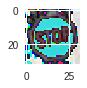

In [217]:
#test if the new generated images are mapped correctly

print (y_train[35316])
plt.figure(figsize=(1,1))
plt.imshow(X_train[35316])
print(X_train[35300].shape)
print("a",X_train[35301])
print("b",X_train[34303])

----

# Step 4: Design and Test a Model Architecture

## Pre-process the Data Set (normalization, grayscale, etc.)

In [136]:
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train)



In [137]:
import numpy as np
from sklearn.utils import shuffle
from skimage import exposure
        
def preprocess_dataset(X, y = None):
    X = (X - X.mean()) / (np.max(X) - np.min(X))  
    return X, y

## Model Architecture

### Layer 1 -  Convolution:
Input shape = (32,32,3) <br>
Strides = 1 <br>
Padding = SAME <br>
Window size for convolution stride = (4, 4, 3, 32) <br>
Activation = Relu (Rectifier) <br>
Dropout = 0.9 <br>
Max pool with stride (2) <br>


###  Layer 2 -  Convolution:
Input shape = (16, 16, 32) <br>
Strides = 1 <br>
Padding = SAME <br>
Window size for convolution stride = (4, 4, 32, 64) <br>
Activation = Relu (Rectifier) <br>
Dropout = 0.8 <br>
Max pool with stride (2) <br>



###  Layer 3 -  Convolution:
Input shape = (8, 8, 64) <br>
Strides = 1 <br> 
Padding = SAME <br>
Window size for convolution stride = (4, 4, 64, 128) <br>
Activation = Relu (Rectifier) <br>
Dropout = 0.7 <br> 
Max pool with stride (2) <br> 


### Layer 4 - Flat and fully connected:  
Input shape = (4, 4, 128) <br>
Activation = Relu (Rectifier) <br> 
Dropout = 0.5 <br> 
Number of weights in output = 1024 <br>


### Layer 5 - Flat and fully connected:  
Input shape = (1024) <br>
Activation = Relu (Rectifier) <br>
Dropout = 0.5 <br>
Number of weights in output = 256 <br>

### Layer 6 - Flat and fully connected:  
Input shape = (256) <br> 
Activation = Relu (Rectifier) <br> 
Number of weights in output = 43 = Number of traffic sign classes <br>

In [138]:
import sys
sys.executable

'/home/x/anaconda3/bin/python'

In [139]:
## Setup Tensorflow
from jupyter_core.paths import jupyter_data_dir
print(jupyter_data_dir())

/home/x/.local/share/jupyter


In [202]:
import tensorflow as tf
EPOCHS = 500
BATCH_SIZE = 128

In [203]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    
    #Convolution Layer 1 - Input (32,32,3)
    conv1_W = tf.Variable(tf.truncated_normal(shape=(4, 4, 3, 32), mean = mu, stddev = sigma))
    
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b
    
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, 0.9)
    
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    print("con1",conv1.shape)
    
    #Convolution Layer 2 - Input (16, 16, 32)
    conv2_W = tf.Variable(tf.truncated_normal(shape=(4, 4, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b

    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, 0.8)

    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    print("conv2", conv2.shape)
    

    #Convolution Layer 3 - Input  (8, 8, 64)
    conv3_W = tf.Variable(tf.truncated_normal(shape=(4, 4, 64, 128), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(128))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b
    
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.dropout(conv3, 0.7)

    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    print("conv3", conv3.shape)
    
    
    # Layer 4 - Flat and fully connected  Input (4, 4, 128)
    fc0   = flatten(conv3)
    
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2048, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, 0.5)
    print("fc1", fc1.shape)
    
    
    
    #Layer 5 - Flat and fully connected  Input (1024)
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 256), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(256))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, 0.5)
    print("fc2", fc2)
    
    
    # SOLUTION: Layer 6: Fully Connected. Input (256)
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(256, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    logits = tf.nn.l2_normalize(logits,[0,1])
    return logits

In [204]:
#features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Train, Validate and Test the Model

In [205]:
#Training Pipeline
rate = 0.001

logits = LeNet(x)
##cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=one_hot_y)


loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

con1 (?, 16, 16, 32)
conv2 (?, 8, 8, 64)
conv3 (?, 4, 4, 128)
fc1 (?, 1024)
fc2 Tensor("dropout_39/mul:0", shape=(?, 256), dtype=float32)


In [206]:
#Model Evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.int32))
saver = tf.train.Saver()
sess = tf.Session()
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    #sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples




# Step 5: Model Evaluation

In [207]:
#Model Evaluation

#train
import datetime as dt
trainingAccuracyList = []
validationAccuracyList = []

if (1):
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)    
    X_train, y_train = preprocess_dataset(X_train,y_train)   
    X_valid, y_valid = preprocess_dataset(X_valid,y_valid)
    print("Training...")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        training_accuracy = evaluate(X_train[:10000],y_train[:10000])
        trainingAccuracyList.append(training_accuracy)
       
        validation_accuracy = evaluate(X_valid, y_valid)
        validationAccuracyList.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Accuracy = {:-3f}".format(training_accuracy))

        assert(len(X_valid)==len(y_valid))
        

Training...
EPOCH 1 ...
Validation Accuracy = 0.469
Training Accuracy = 0.545200
EPOCH 2 ...
Validation Accuracy = 0.696
Training Accuracy = 0.777900
EPOCH 3 ...
Validation Accuracy = 0.794
Training Accuracy = 0.865800
EPOCH 4 ...
Validation Accuracy = 0.831
Training Accuracy = 0.901100
EPOCH 5 ...
Validation Accuracy = 0.855
Training Accuracy = 0.922900
EPOCH 6 ...
Validation Accuracy = 0.871
Training Accuracy = 0.927600
EPOCH 7 ...
Validation Accuracy = 0.872
Training Accuracy = 0.929500
EPOCH 8 ...
Validation Accuracy = 0.877
Training Accuracy = 0.937600
EPOCH 9 ...
Validation Accuracy = 0.883
Training Accuracy = 0.941200
EPOCH 10 ...
Validation Accuracy = 0.899
Training Accuracy = 0.948000
EPOCH 11 ...
Validation Accuracy = 0.895
Training Accuracy = 0.955000
EPOCH 12 ...
Validation Accuracy = 0.908
Training Accuracy = 0.959600
EPOCH 13 ...
Validation Accuracy = 0.917
Training Accuracy = 0.967400
EPOCH 14 ...
Validation Accuracy = 0.927
Training Accuracy = 0.972700
EPOCH 15 ...
Vali

# Step 6: Plot Accuracy of Validation and Training

In [208]:
print("The accuracy on the test set is", evaluate(X_test, y_test))

The accuracy on the test set is 0.890102929561


In [209]:
from sklearn.metrics import confusion_matrix, classification_report

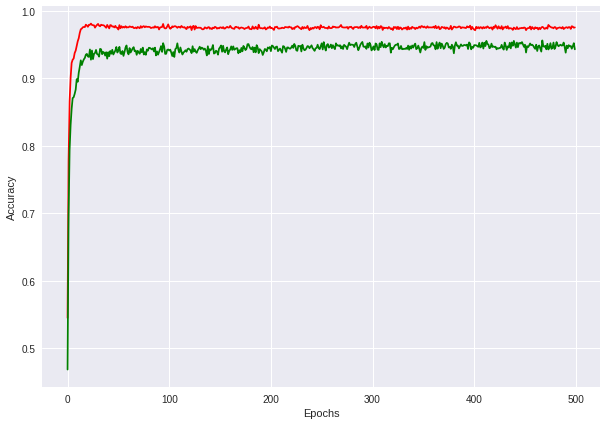

In [210]:
plt.figure(figsize=(10,7))

plt.plot(range(0,EPOCHS),trainingAccuracyList,"r")
plt.plot(range(0,EPOCHS),validationAccuracyList,"g")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()




---

# Step 7: Test a Model on New Images


## Load and Output the Images

In [211]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

from PIL import Image
im1 = plt.imread("/home/x/Desktop/privateGit/CarND-Traffic-Sign-Classifier-Project/onlineTrafficSigns/image1.jpg")
im2 = plt.imread("/home/x/Desktop/privateGit/CarND-Traffic-Sign-Classifier-Project/onlineTrafficSigns/image2.jpg")
im3 = plt.imread("/home/x/Desktop/privateGit/CarND-Traffic-Sign-Classifier-Project/onlineTrafficSigns/image3.jpg")
im4 = plt.imread("/home/x/Desktop/privateGit/CarND-Traffic-Sign-Classifier-Project/onlineTrafficSigns/image4.jpg")
im5 = plt.imread("/home/x/Desktop/privateGit/CarND-Traffic-Sign-Classifier-Project/onlineTrafficSigns/image5.jpg")


y_CorrectLabel = [11,3,40,17,1]



## Predict the Sign Type for Each Image

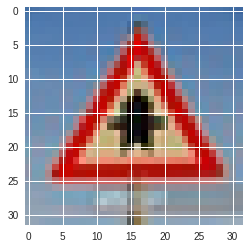

Predicted: Right-of-way at the next intersection 



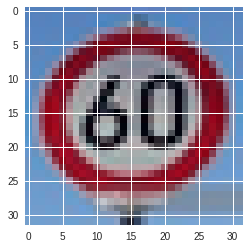

Predicted: Speed limit (60km/h) 



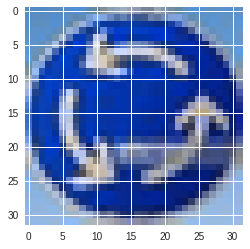

Predicted: Roundabout mandatory 



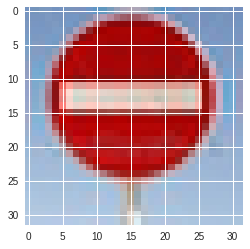

Predicted: No entry 



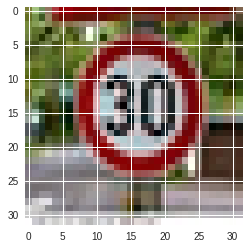

Predicted: Speed limit (30km/h) 



In [212]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.


def predictForNewImages(image):
    
    plt.imshow(image)
    plt.show()
    return  sess.run(logits,feed_dict={x:[image]})

pred=[]
preprocess_dataset(im1)
predIm1 = predictForNewImages(im1)
pred.append(int(ny.argmax(predIm1,1)))
print ("Predicted:", signs.iloc[pred[0]]["SignName"],"\n")

preprocess_dataset(im2) 
predIm2 = predictForNewImages(im2)
pred.append(int(ny.argmax(predIm2,1)))
print ("Predicted:", signs.iloc[pred[1]]["SignName"],"\n")


preprocess_dataset(im3) 
predIm3 = predictForNewImages(im3)
pred.append(int(ny.argmax(predIm3,1)))
print ("Predicted:",signs.iloc[pred[2]]["SignName"],"\n")


preprocess_dataset(im4)
predIm4 = predictForNewImages(im4)
pred.append(int(ny.argmax(predIm4,1)))
print ("Predicted:",signs.iloc[pred[3]]["SignName"],"\n")


preprocess_dataset(im5)
predIm5 = predictForNewImages(im5)
pred.append(int(ny.argmax(predIm5,1)))
print ("Predicted:",signs.iloc[pred[4]]["SignName"],"\n")


# Step 8: Analyze Performance

In [213]:
falsePredicions = [j for (i,j) in zip(pred,y_CorrectLabel) if i!=j]


accuracy = (len(y_CorrectLabel) - len(falsePredicions)) / len(y_CorrectLabel)
print("Accuracy of prediction on new Images: ", accuracy*100 , "%")

Accuracy of prediction on new Images:  100.0 %


# Step 9: Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [214]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


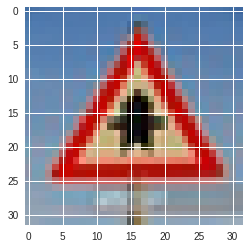

The predictions for this image according to the probabilities are as below:
11    Right-of-way at the next intersection
21                             Double curve
35                               Ahead only
1                      Speed limit (30km/h)
28                        Children crossing
Name: SignName, dtype: object

The Probabilities for the above guesses are  [ 0.0614364   0.02253529  0.02241389  0.02241038  0.02239351]  respectively


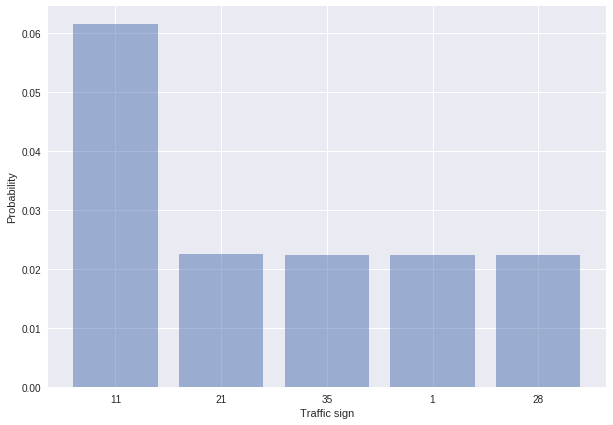

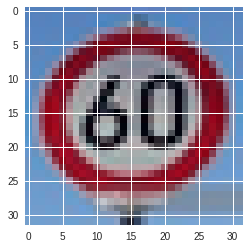

The predictions for this image according to the probabilities are as below:
2                                  Speed limit (50km/h)
3                                  Speed limit (60km/h)
37                                  Go straight or left
42    End of no passing by vehicles over 3.5 metric ...
41                                    End of no passing
Name: SignName, dtype: object

The Probabilities for the above guesses are  [ 0.04757888  0.0438187   0.02218283  0.02218211  0.02218204]  respectively


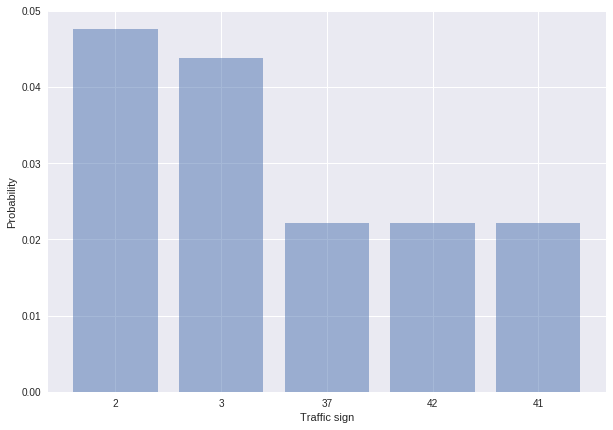

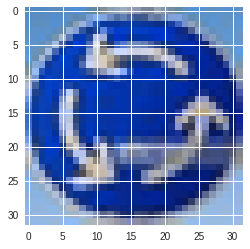

The predictions for this image according to the probabilities are as below:
40                                 Roundabout mandatory
42    End of no passing by vehicles over 3.5 metric ...
32                  End of all speed and passing limits
41                                    End of no passing
29                                    Bicycles crossing
Name: SignName, dtype: object

The Probabilities for the above guesses are  [ 0.06146583  0.02235655  0.02235648  0.02235617  0.02235474]  respectively


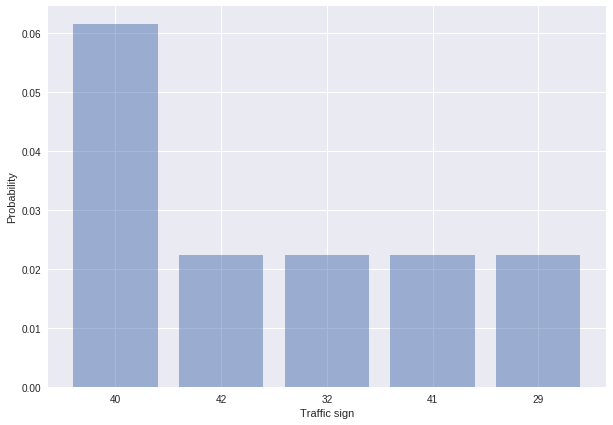

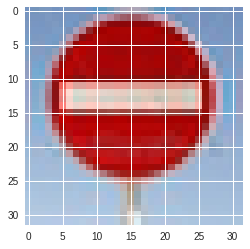

The predictions for this image according to the probabilities are as below:
12           Priority road
2     Speed limit (50km/h)
1     Speed limit (30km/h)
4     Speed limit (70km/h)
13                   Yield
Name: SignName, dtype: object

The Probabilities for the above guesses are  [ 0.23875612  0.22657852  0.22098997  0.21332149  0.21017477]  respectively


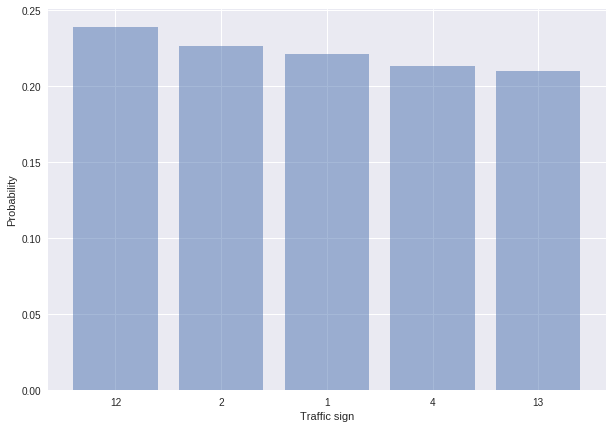

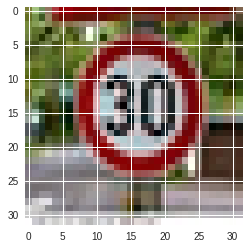

The predictions for this image according to the probabilities are as below:
1                                  Speed limit (30km/h)
37                                  Go straight or left
42    End of no passing by vehicles over 3.5 metric ...
41                                    End of no passing
32                  End of all speed and passing limits
Name: SignName, dtype: object

The Probabilities for the above guesses are  [ 0.98811376 -0.02319465 -0.02326695 -0.0232681  -0.02326963]  respectively


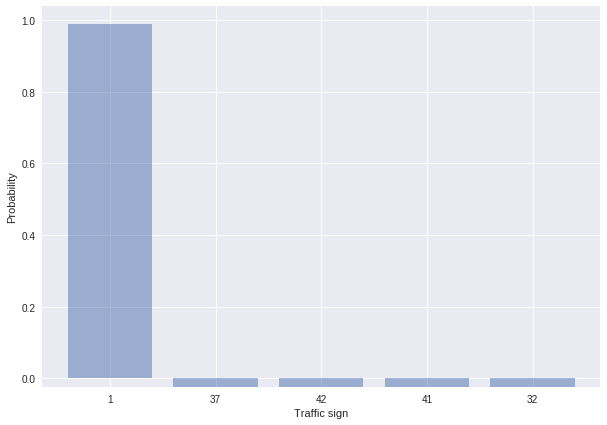

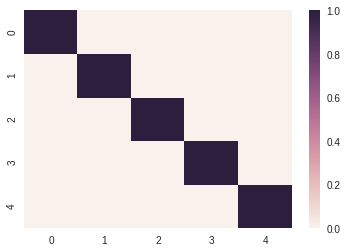


f1 score is  1.0


In [215]:
def printTop5PredictionsForEachImage(image, indices, values):
    #print("top 5 values:", top_5.indices)
    index = 0
    for x,y in zip(indices,values):
        plt.imshow(image)
        plt.show()
        print("The predictions for this image according to the probabilities are as below:")
        signName = signs.loc[x]["SignName"]
        print(signName)
        index = index +1
        
    y_pos = np.arange(5)

    print ("\nThe Probabilities for the above guesses are ", values[0], " respectively")
    plt.figure(figsize=(10,7))
    plt.bar(y_pos, values[0], align='center', alpha=0.5)
    plt.xticks(y_pos, indices[0])
    plt.ylabel('Probability')
    plt.xlabel('Traffic sign')
    plt.show()
        

    print("\n\n\n")

first  = sess.run(tf.nn.top_k(tf.nn.softmax(logits),k=5),feed_dict={x:[im1]})
second  = sess.run(tf.nn.top_k(tf.nn.softmax(logits),k=5),feed_dict={x:[im2]})
third  = sess.run(tf.nn.top_k(tf.nn.softmax(logits),k=5),feed_dict={x:[im3]})
four  = sess.run(tf.nn.top_k(tf.nn.softmax(logits),k=5),feed_dict={x:[im4]})
five  = sess.run(tf.nn.top_k(tf.nn.softmax(logits),k=5),feed_dict={x:[im5]})


printTop5PredictionsForEachImage(im1, first.indices, ny.array(first.values))
printTop5PredictionsForEachImage(im2, second.indices, ny.array(second.values))
printTop5PredictionsForEachImage(im3, third.indices, ny.array(third.values))
printTop5PredictionsForEachImage(im4, fourth.indices, ny.array(fourth.values))
printTop5PredictionsForEachImage(im5, fifth.indices, ny.array(fifth.values))

y=ny.array(y_CorrectLabel)
p=ny.array(pred)

ny.array(y_CorrectLabel)
ny.array(pred)
conf = confusion_matrix(y_CorrectLabel, pred )
 

sns.heatmap(conf)
plt.show()
print("\nf1 score is ", f1_score(y_CorrectLabel, pred, average="macro"))
#print("Precision is ", precision_score(y_CorrectLabel, pred, average="macro"))
#print("Recall is ", recall_score(y_CorrectLabel, pred, average="macro"))    

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

# Writeup / README :

## 1. Provide a basic summary of the data set and identify where in your code the summary was done. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.


The code for this is contained in the Step 1 of this Notebook


## 2. Include an exploratory visualization of the dataset and identify where the code is in your code file.

The code for this is contained in the Step 2 of this notebook

# Design and Test a Model Architecture

## 1. Describe how, and identify where in your code, you preprocessed the image data. What tecniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc.

In the step 4 of this notebook preprocessing of the images is done.

Here the images are normalized. This increases the accuracy by 2 percent and the algorithm reaches its peak accuracy faster than doing without normalization.

I tried preprocessing the images to gray scale. But it did not seem to increase the accuracy at all. So I ignored Greyscaling the image.

Further the training images were shuffled in order to prevent any preordering within them.


## 2. Describe how, and identify where in your code, you set up training, validation and testing data. How much data was in each set? Explain what techniques were used to split the data into these sets. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, identify where in your code, and provide example images of the additional data)

Since the number of Images for some of the class IDs are less, I decided to generate new images by rotating them slightly. The code for this can be found under step 3. The dict plot after generating the images show the increase in the number of images in the classes where there were less images to train.

After generating new images the number of training images were 40637.<br>

Since the images I used came in three groups as test, train, valid I did not do any further split the traing set. 

If I had to split I would have used test_train_split from sklearn.model_selection Library

## 3. Describe, and identify where in your code, what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

The code for this section can be found in Step 4 of this notebook. I modified the LeNet architecture so that it can observe more feature data. The strucure of my network is as follows, The input dimention is 32x32x3 (RGB Image)


#### Layer 1 -  Convolution:
Input shape = (32,32,3) <br>
Strides = 1 <br>
Padding = SAME <br>
Window size for convolution stride = (4, 4, 3, 32) <br>
Activation = Relu (Rectifier) <br>
Dropout = 0.9 <br>
Max pool with stride (2) <br>


####  Layer 2 -  Convolution:
Input shape = (16, 16, 32) <br>
Strides = 1 <br>
Padding = SAME <br>
Window size for convolution stride = (4, 4, 32, 64) <br>
Activation = Relu (Rectifier) <br>
Dropout = 0.8 <br>
Max pool with stride (2) <br>



####  Layer 3 -  Convolution:
Input shape = (8, 8, 64) <br>
Strides = 1 <br> 
Padding = SAME <br>
Window size for convolution stride = (4, 4, 64, 128) <br>
Activation = Relu (Rectifier) <br>
Dropout = 0.7 <br> 
Max pool with stride (2) <br> 


#### Layer 4 - Flat and fully connected:  
Input shape = (4, 4, 128) <br>
Activation = Relu (Rectifier) <br> 
Dropout = 0.5 <br> 
Number of weights in output = 1024 <br>


#### Layer 5 - Flat and fully connected:  
Input shape = (1024) <br>
Activation = Relu (Rectifier) <br>
Dropout = 0.5 <br>
Number of weights in output = 256 <br>

#### Layer 6 - Flat and fully connected:  
Input shape = (256) <br> 
Activation = Relu (Rectifier) <br> 
Number of weights in output = 43 = Number of traffic sign classes <br>

## 4. Describe how, and identify where in your code, you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

The code for this section is found in Step 5 of this notebook. 
The type of Optimizer used is Adam Optimiser. This is because of the following reason.

"The tf.train.AdamOptimizer uses Kingma and Ba's Adam algorithm to control the learning rate. Adam offers several advantages over the simple tf.train.GradientDescentOptimizer. Foremost is that it uses moving averages of the parameters (momentum); Bengio discusses the reasons for why this is beneficial in Section 3.1.1 of this paper. Simply put, this enables Adam to use a larger effective step size, and the algorithm will converge to this step size without fine tuning.

The main down side of the algorithm is that Adam requires more computation to be performed for each parameter in each training step (to maintain the moving averages and variance, and calculate the scaled gradient); and more state to be retained for each parameter (approximately tripling the size of the model to store the average and variance for each parameter). A simple tf.train.GradientDescentOptimizer could equally be used in your MLP, but would require more hyperparameter tuning before it would converge as quickly." - Source http://stats.stackexchange.com/questions/184448/difference-between-gradientdescentoptimizer-and-adamoptimizer-tensorflow



Batch Size = 128 <br>
number of Epochs = 1000 <br>
Learning rate = 0.0005 <br>
mu = 0 <br>
sigma = 0.1 <br>

## 5. Describe the approach taken for finding a solution. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

The code for calculating the accuracy of the model is located in Step 5 of the Ipython notebook.
  
training set accuracy = 99% <br>
validation set accuracy = 96%<br>
test set accuracy = 86%<br>

I used an already known implementation of conv network (LeNet) which is originally used for classifying letters and numbers in  US postal system and extended its layers by adding an additional convolution layer and a fully connected layer so that it can store more features which can be used for identifying the traffic signs. 


### 1.What was the first architecture that was tried and why was it chosen?
The first Architecture that I chose for a LeNet convolution network. I chose this because it is already proven to detect numbers from texts and currectly classify them. I got an accuracy about 91% with this model.

### 2. What were some problems with the initial architecture?
 I could get the validation accuracy upto 91 % but not more than that. So  I decided to add more feature detectors to the network.

### 3. How was the architecture adjusted and why was it adjusted? Typical adjustments could include choosing a different model architecture, adding or taking away layers (pooling, dropout, convolution, etc), using an activation function or changing the activation function. One common justification for adjusting an architecture would be due to over fitting or under fitting. A high accuracy on the training set but low accuracy on the validation set indicates over fitting; a low accuracy on both sets indicates under fitting.

The Architechture was adjusted by adding  a third convolution layer. The depth was in increased to 32 in the first convolution layer. In the second convolution layer, I changed the depth to 64. The third has a depth of 128. This layer is then flattened to 2048.

Initially with the LeNet architecture I found out that the Training accuracy reached 99.5% within the first 20 epocs. I considered it to be overfitting and hence I added more dropout Layers to improve the generalization of the model and it worked. It improved the validation accuracy of my model to more that 95%.

I tried with preprocessing the images to Grey scale but it made the accuracy worser and hence I removed this preprocessing step.

Normalization of the Matrix values increased the accuracy by more than 2%.

The final plot of the Validation and training can be found under the section Step 6 of the Ipython notebook.


### 4. Which parameters were tuned? How were they adjusted and why?

The leaning rate was tuned many times. I initially tried with 0.1 but the accuracy did not seem to go above 90 %. I then tried 0.0001 but it made the learning process very slow and I did not get much more accuracy with this rate too. Finally I tried 0.0005 and it seemed to give the best possible accuary. 


Similary I also tried with the dropout percentage and ended up having 0.9, 0.8, 0.7 for the conv layers and 0.5 for the fully connected layers. 


I also played around with the value of sigma and ended with with 0.1

### 5. What are some of the important design choices and why were they chosen? For example, why might a convolution layer work well with this problem? How might a dropout layer help with creating a successful model?

According to this paper, https://arxiv.org/pdf/1506.02158v6.pdf adding more dropout in the fully connected layers is better than having more dropouts in the convolution layers. This is the reson why is chose the keep probability to be 0.9, 0.8, 0.7 for conv layers and 0.5 for the fully connected layer.

# Test a Model on New Images


### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.


The code for this can be found in step 7 of this notebook. Five traffic signs from Germany have been chosen and they are used for testing the training model.

### 2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. Identify where in your code predictions were made. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

The prediction and accuracy can be found in Step 7 and Step 8 of this notebook. The trained model seems to perform well in real life and I get constantly >80% accuracy with the new images.

### 3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction and identify where in your code softmax probabilities were outputted. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

The code can be found in step 9